# Import of Other Python Libraries and Data

In [1]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
sns.set_style('whitegrid')
sns.set_theme(style='whitegrid')

The dataset used for this analysis is the Wine Quality Dataset, which was retrieved from the UCI Machine Learning Repository (Cortez et al., 2009).

In [3]:
wine_quality = fetch_ucirepo(id=186)

X = wine_quality.data.original

# Sneak Peek of Data

Imported here is a data set corresponding to wine quality and variables/features affecting it. For this exercise, main assumption is that there is little domain knowledge involved to affect the bias in performing the exploration. Additional assumption is that there are 11 features and 2 possible targets (quality and color) for classification.

A peak of the first 10 rows of the data.

In [4]:
display(X.head(10))

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red  
5      9.4        5   red  
6      9.4        5   red  
7     10.0        7   red  
8      9.5        7   red  
9     10.5        5   red

Checking the column names of the data. This includes possible features and target for machine learning.

In [5]:
print(f'Columns: \n{X.columns}\n')
print(f'Shape: \n{X.shape}\n')
print(f'Info: \n{X.info()}\n')

Columns: 
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

Shape: 
(6497, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol   

Upon checking, data seems to be clean and has no missing data hence there is no need to drop (or impute) the missing data.

Quick checking of statistics of data. Adding parameter include='all' to also see statistics for color -- which is a categorical data.

In [6]:
X.describe(include='all').T

count unique    top  freq        mean        std  \
fixed_acidity         6497.0    NaN    NaN   NaN    7.215307   1.296434   
volatile_acidity      6497.0    NaN    NaN   NaN    0.339666   0.164636   
citric_acid           6497.0    NaN    NaN   NaN    0.318633   0.145318   
residual_sugar        6497.0    NaN    NaN   NaN    5.443235   4.757804   
chlorides             6497.0    NaN    NaN   NaN    0.056034   0.035034   
free_sulfur_dioxide   6497.0    NaN    NaN   NaN   30.525319    17.7494   
total_sulfur_dioxide  6497.0    NaN    NaN   NaN  115.744574  56.521855   
density               6497.0    NaN    NaN   NaN    0.994697   0.002999   
pH                    6497.0    NaN    NaN   NaN    3.218501   0.160787   
sulphates             6497.0    NaN    NaN   NaN    0.531268   0.148806   
alcohol               6497.0    NaN    NaN   NaN   10.491801   1.192712   
quality               6497.0    NaN    NaN   NaN    5.818378   0.873255   
color                   6497      2  white  4898         NaN        NaN   

                          min      25%      50%      75%      max  
fixed_acidity             3.8      6.4      7.0      7.7     15.9  
volatile_acidity         0.08     0.23     0.29      0.4     1.58  
citric_acid               0.0     0.25     0.31     0.39     1.66  
residual_sugar            0.6      1.8      3.0      8.1     65.8  
chlorides               0.009    0.038    0.047    0.065    0.611  
free_sulfur_dioxide       1.0     17.0     29.0     41.0    289.0  
total_sulfur_dioxide      6.0     77.0    118.0    156.0    440.0  
density               0.98711  0.99234  0.99489  0.99699  1.03898  
pH                       2.72     3.11     3.21     3.32     4.01  
sulphates                0.22     0.43     0.51      0.6      2.0  
alcohol                   8.0      9.5     10.3     11.3     14.9  
quality                   3.0      5.0      6.0      6.0      9.0  
color                     NaN      NaN      NaN      NaN      NaN

It can be observed that the scales vary for each feature. Example is that *chlorides* ranges from ~0.009-0.611 while *total_sulfur_dioxide* ranges from 6.0-440.0. It is obvious that proper scaling should be used later if we want to compare and visualize the data using boxplots and violinplots.

# Quality Distribution (Bar plots as histograms)

Visualizing the proportion of the count of the different quality. Note that using bar graph over pie chart to visualize proportions is a preference.
Here, it is observed that the majority of the quality score is centered around 6.0.

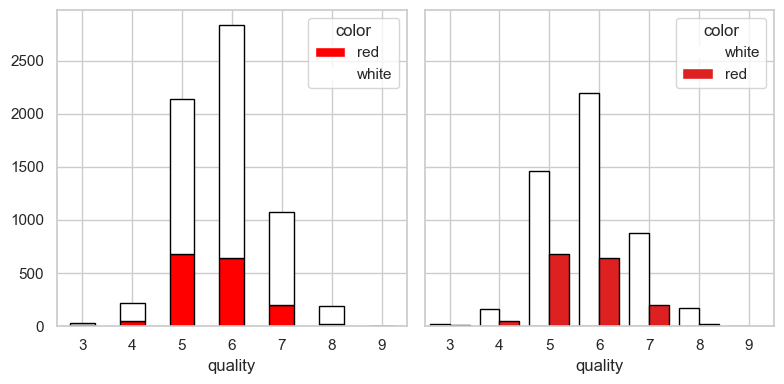

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

color_palette = {'red': 'red', 'white': 'white'}
df_to_view = X[['quality', 'color']].value_counts().reset_index()

(
    df_to_view
    .pivot(index='quality', columns='color', values='count')
    .plot(kind='bar', stacked=True, ax=ax[0], 
          color=[color_palette['red'], color_palette['white']])
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
plt.grid()

sns.barplot(
    data=df_to_view,
    x='quality',
    y='count',
    hue='color',
    ax=ax[1],
    palette=[color_palette['white'], color_palette['red']]
)
plt.grid()

for patch in ax[0].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

for patch in ax[1].patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

plt.tight_layout()

Above are two plots which shows distribution. Both plots show the same data but the left one is stacked to display the distribution without segmenting it by color. Right plot is shown if distribution by color is of interest.

# Mean (and Confidence Interval) for each Feature

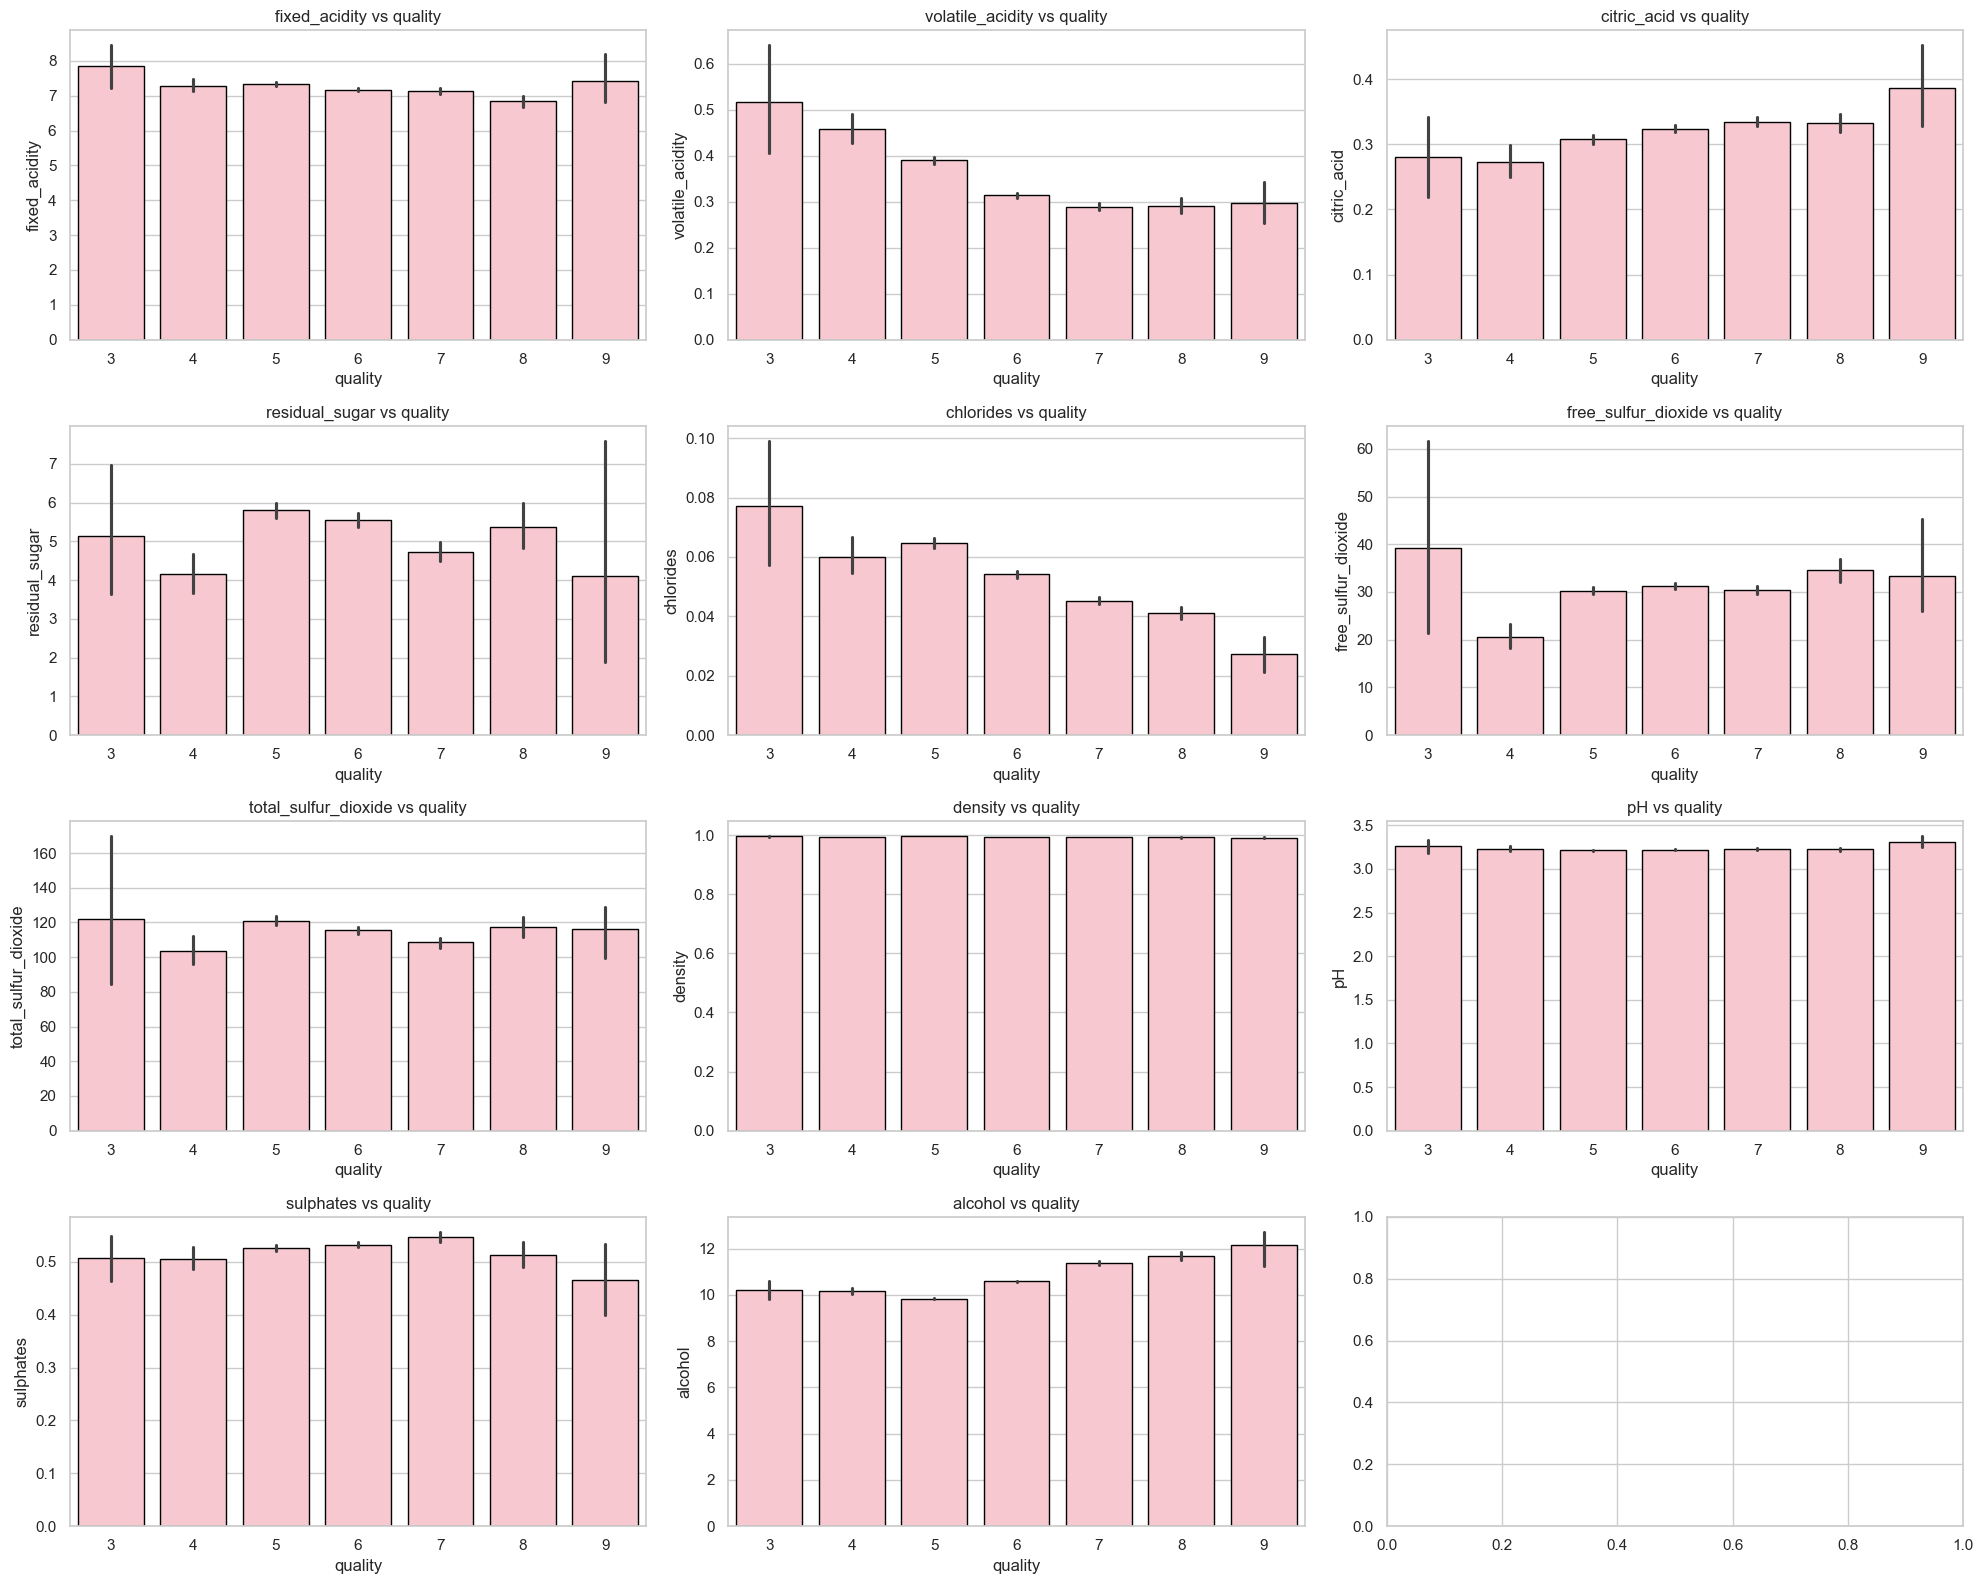

In [8]:
fig, ax = plt.subplots(4, 3, figsize=(20, 16))

for i, col_name in enumerate(X.columns[:-2]):
    row = i // 3
    col = i % 3
    sns.barplot(X, x='quality', y=col_name, ax=ax[row, col], color='pink')
    ax[row, col].set_title(f'{col_name} vs quality')
    
    for patch in ax[row, col].patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
plt.tight_layout()

Above shows the mean with the error bar (the black wick) which represents the 95% confidence interval of the 11 features against the quality. Some initial insights that can be observed based on plots are the following:

| feature | if_feature | target | then_target |
| - | :- | :-: | -: |
| volatile_acidity | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ |
| citric_acid | $\color{green}{\uparrow}$ |  quality | $\color{green}{\uparrow}$ |
| chlorides | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ |
| alcohol | $\color{green}{\uparrow}$ | quality | $\color{green}{\uparrow}$ |

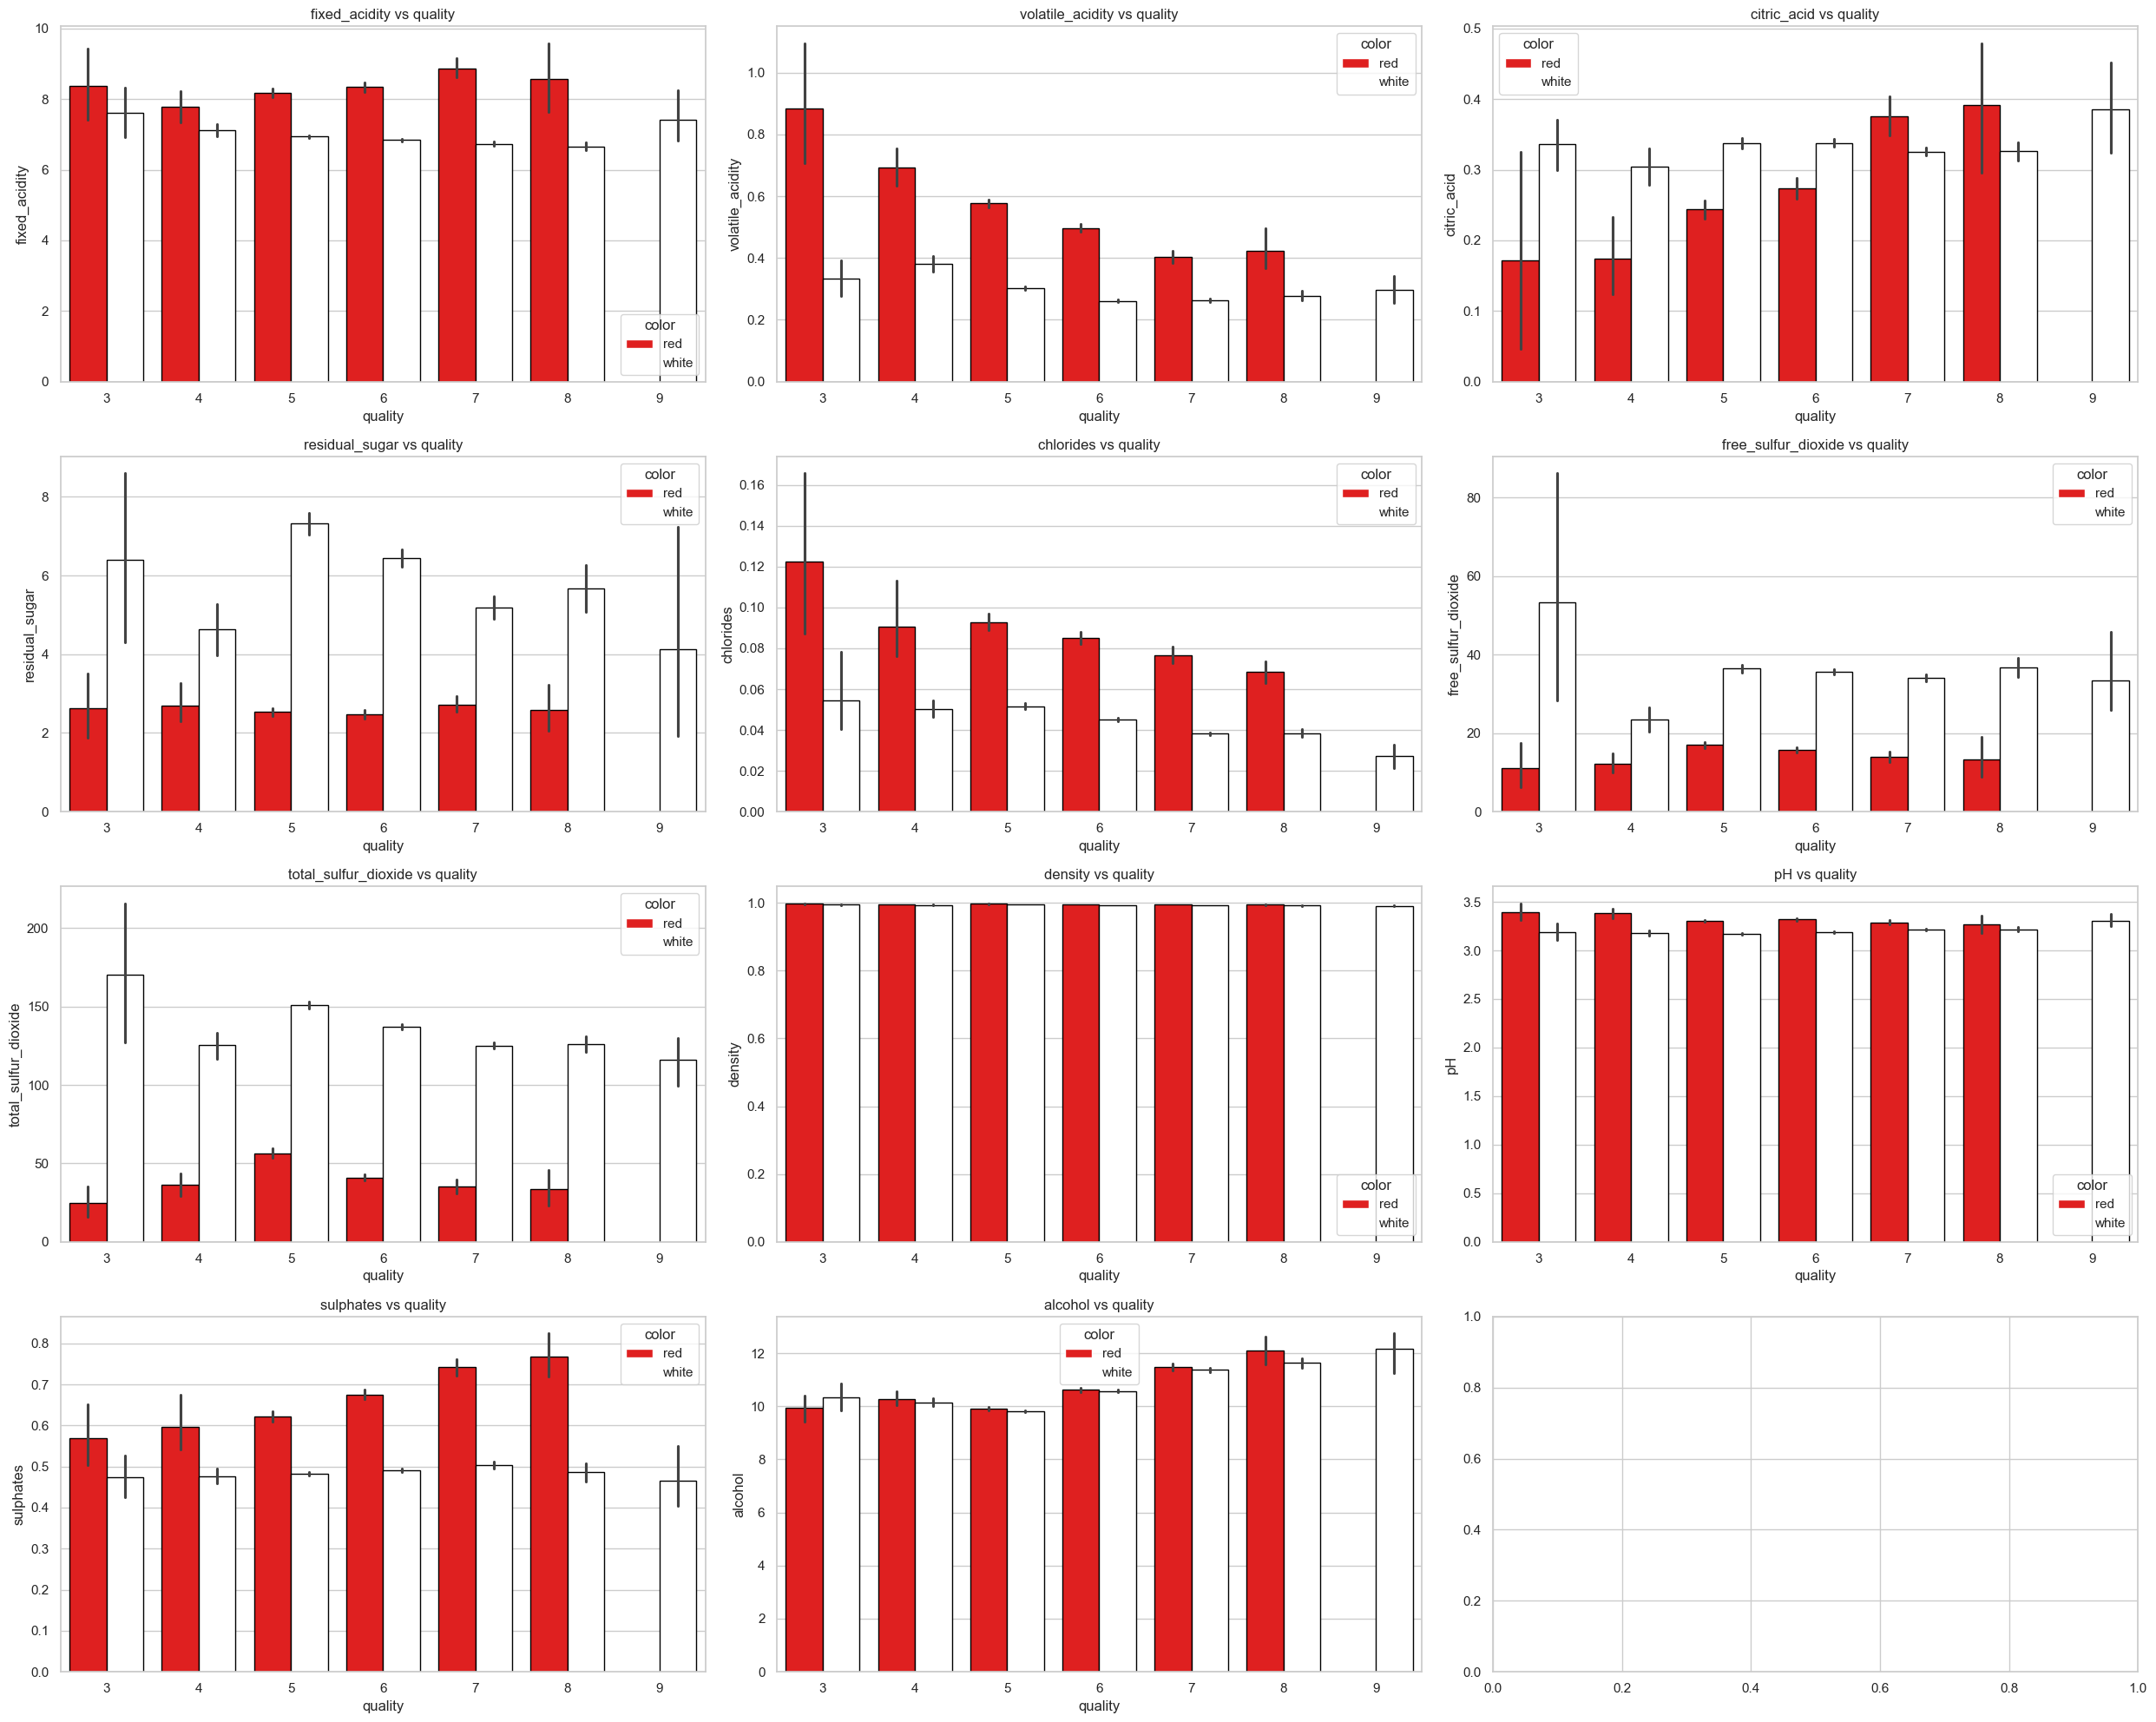

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(25, 20))

for i, col_name in enumerate(X.columns[:-2]):
    row = i // 3
    col = i % 3
    sns.barplot(
        X, 
        x='quality', 
        y=col_name, 
        hue='color', 
        ax=ax[row, col],
        palette=[color_palette['red'], color_palette['white']]
    )
    for patch in ax[row, col].patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

    ax[row, col].set_title(f'{col_name} vs quality')

plt.tight_layout()

This shows the same plots but now show distinction for each color (red or white).

These observations are based from above but now with an added note.
| feature | if_feature | target | then_target | notes |
| - | :- | :-: | -: | -: |
| volatile_acidity | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ | Trend seems to only apply for color=red |
| citric_acid | $\color{green}{\uparrow}$ |  quality | $\color{green}{\uparrow}$ | Trend seems to only apply for color=red |
| chlorides | $\color{green}{\uparrow}$ | quality | $\color{red}{\downarrow}$ | Trend applies to both colors |
| alcohol | $\color{green}{\uparrow}$ | quality | $\color{green}{\uparrow}$ | Trend applies to both colors |

Although the purpose of the plot was to view different features against quality, obvious observations regarding the mean can be argued such as:
| feature | observation |
| - | :- |
| volatile_acidity | red > white |
| chlorides | red > white |
| sulphates | red > white |
| residual_sugar |  white > red |
| free_sulfur_dioxide |  white > red |
| total_sulfur_dioxide |  white > red |

An interesting observation here is that no color=red exists for quality=9. This is unsure if this is just due to lack of data (given the fact that quality=9 already has a low count).



# Pairplots

<Figure size 2500x2500 with 0 Axes>

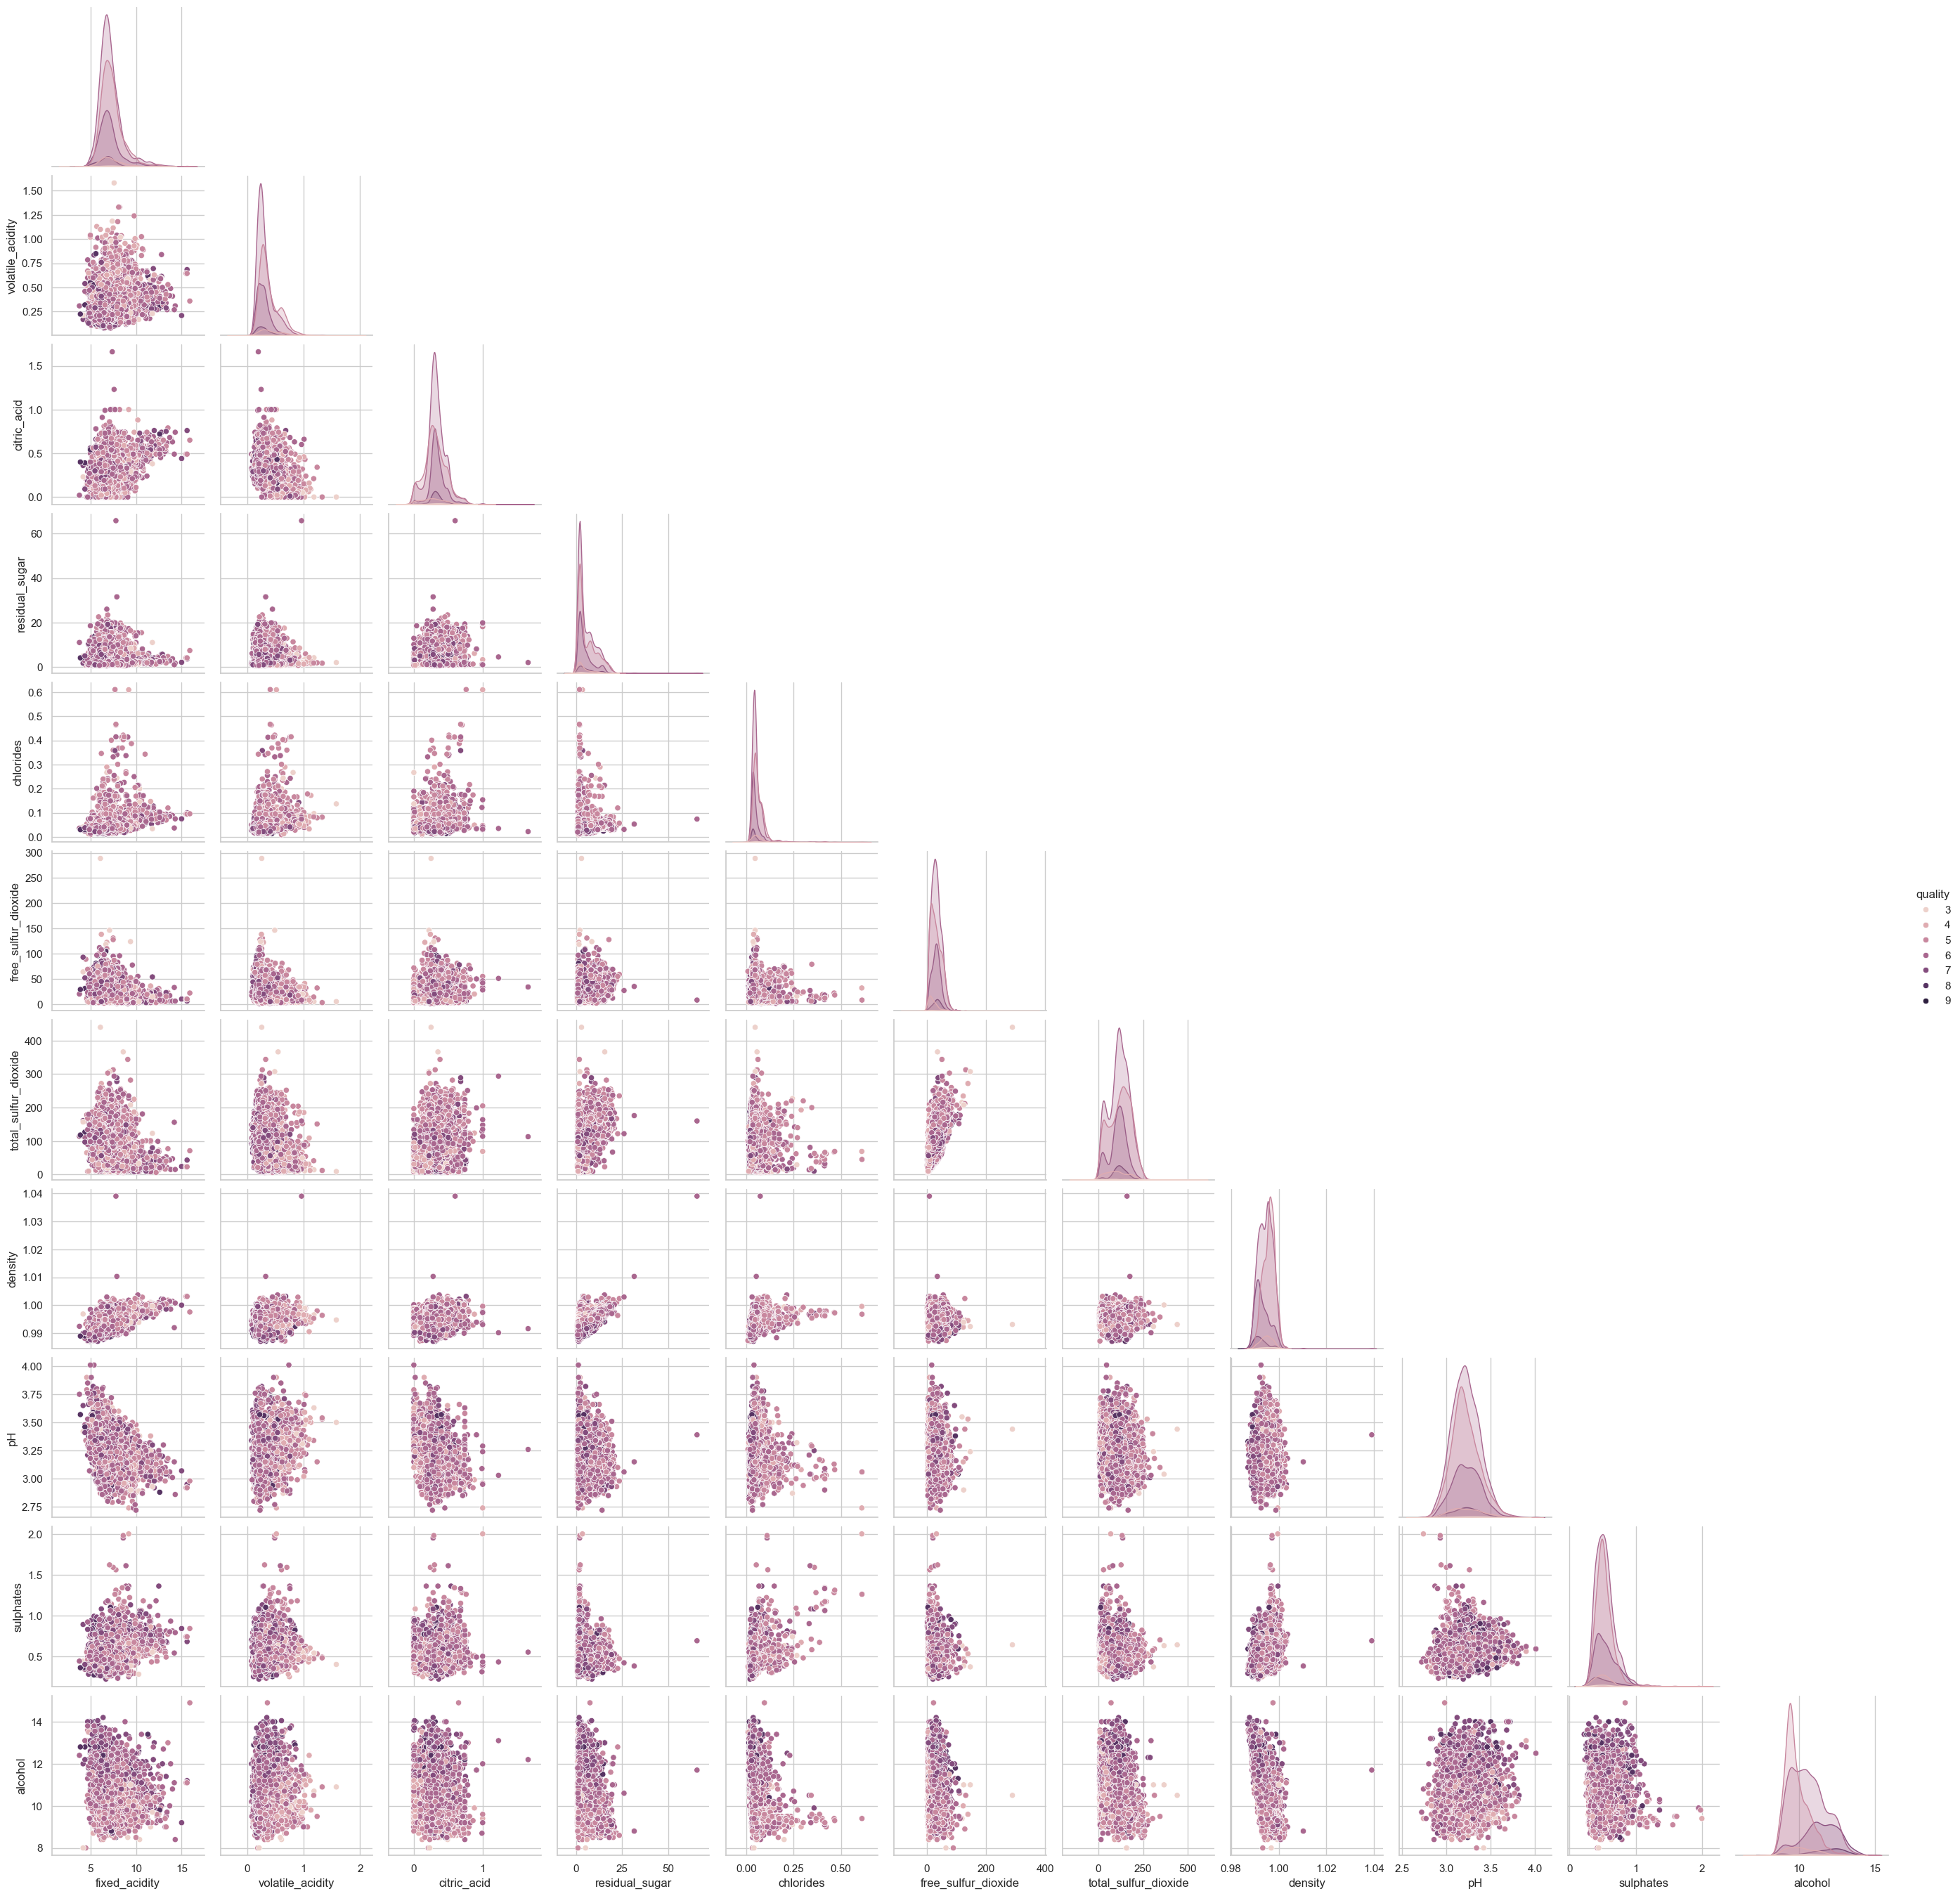

In [10]:
plt.figure(figsize=(25, 25))
sns.pairplot(X.drop('color', axis=1), hue='quality', corner=True);

The purpose of the pairplot was to see if the data can be visually separated by quality value. For each pair of features shown on a scatter plot, there seems to be little distinction for wines per quality score. But this could be somewhat misleading since it is know that majority of the wines have a score of {5, 6, 7}.

<Figure size 2500x2500 with 0 Axes>

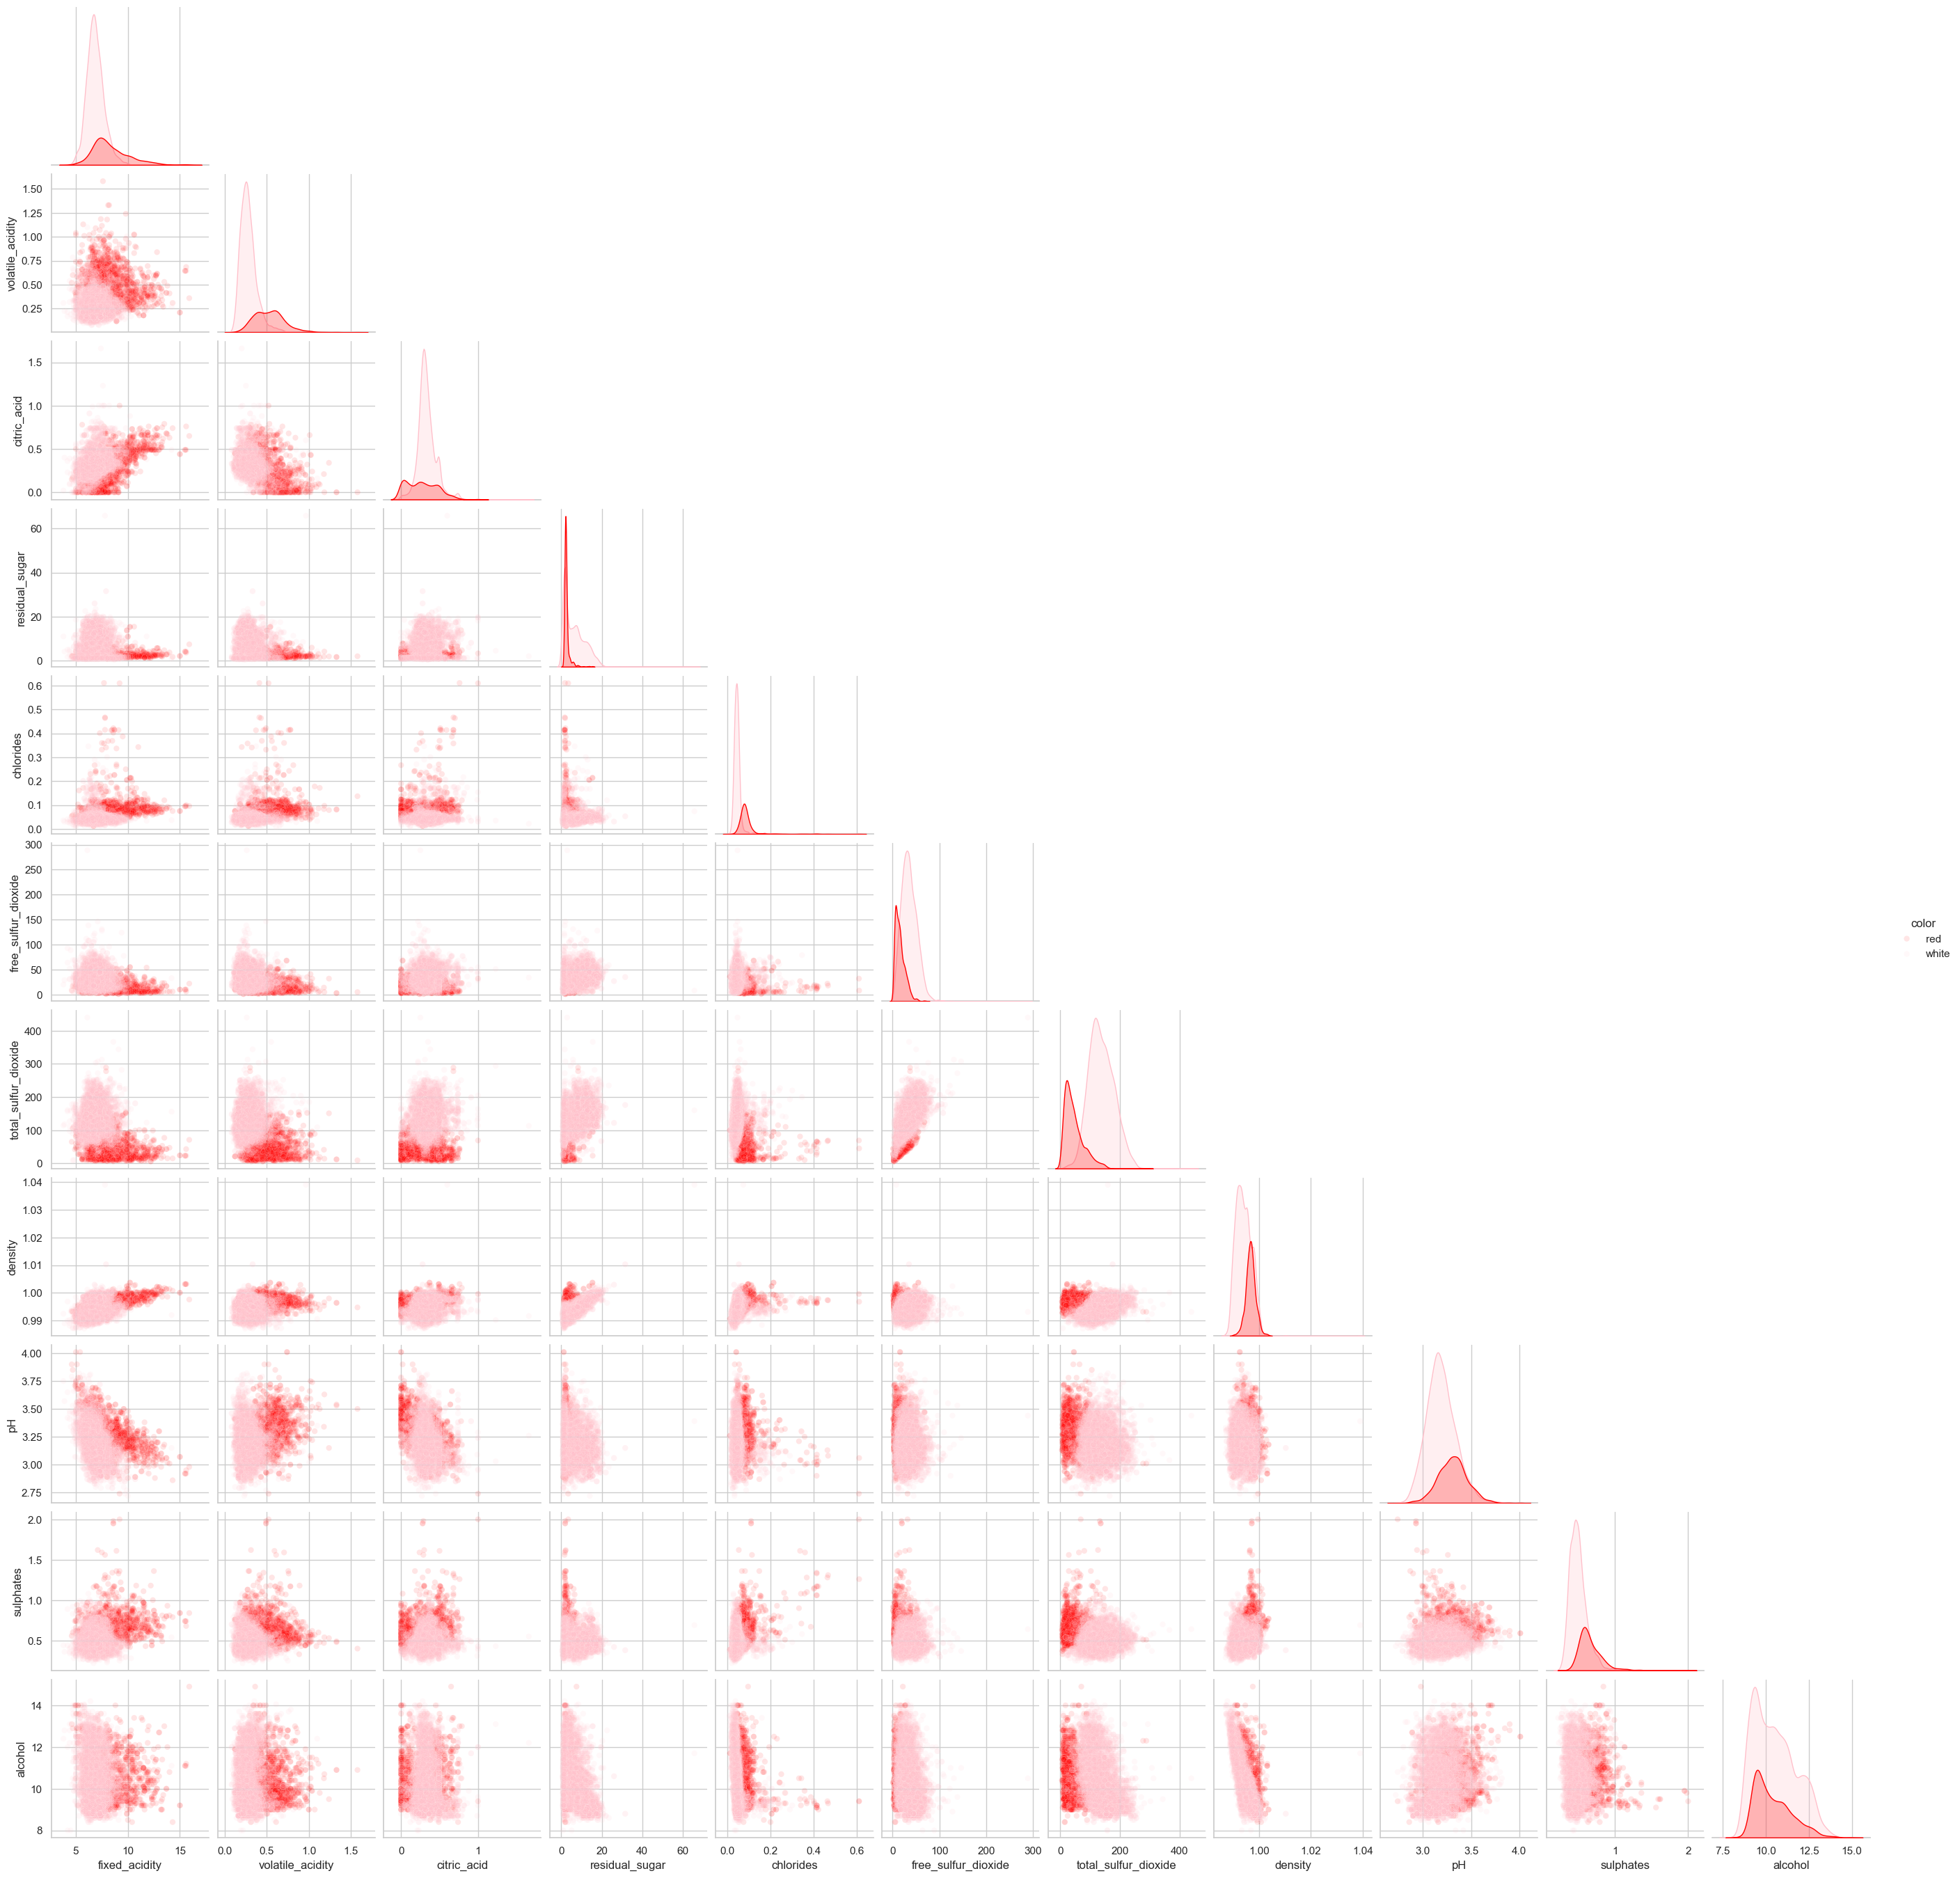

In [11]:
plt.figure(figsize=(25, 25))
sns.pairplot(
    X.drop('quality', axis=1), 
    hue='color', 
    corner=True,
    palette={'red': 'red', 'white': 'pink'},
    # pink was chosen to represent white due to white being hard to visualize for this case
    plot_kws={'alpha': 0.1}
);

This is the same pairplot but now has the color instead of quality as the 'hue'. For some feature pair, there are obvious visual separation against red and white (which for this case was represented by the color pink).

# Raincloud plot (with addtional Boxplots and Violinplots)

In [12]:
scaler = StandardScaler()
X2 = X.drop(['color', 'quality'], axis=1).copy()
X_scaled = scaler.fit_transform(X2)
X_scaled = pd.DataFrame(X_scaled, columns=X2.columns)
display(X_scaled)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -1.100140             -1.446359  1.034993  1.813090   
1               -0.311320             -0.862469  0.701486 -0.115073   
2               -0.874763             -1.092486  0.768188  0.258120   
3               -0.762074             -0.986324  1.101694 -0.363868   
4               -1.100140             -1.446359  1.034993  1.813090   
...                   ...                   ...       ...       ...   
6492            -0.367664             -0.420128 -1.186161  0.320319   
6493             1.491697              0.924588  0.067824 -0.426067   
6494            -0.029599             -0.083949 -0.719251 -1.421248   
6495            -0.593041             -0.101642 -2.003251  0.755710   
6496            -0.480353             -0.313966 -1.763127  0.258120   

      sulphates   alcohol  
0      0.193097 -0.915464  
1      0.999579 -0.580068  
2      0.797958 -0.580068  
3      0.327510 -0.580068  
4      0.193097 -0.915464  
...         ...       ...  
6492  -0.210144  0.593818  
6493  -0.478971 -0.747766  
6494  -0.478971 -0.915464  
6495  -1.016626  1.935402  
6496  -1.419867  1.096912  

[6497 rows x 11 columns]

In [13]:
def generate_colors(n_colors, colormap_name='viridis'):
    cmap = plt.get_cmap(colormap_name)  # Choose a colormap
    colors = [cmap(i) for i in np.linspace(0, 1, n_colors)]  # Generate colors dynamically
    return colors


def raincloud_plot(dataframe, figsize=(25, 25)):
    fig, ax = plt.subplots(figsize=figsize)

    nrows = dataframe.shape[1]

    boxplots_colors = generate_colors(nrows)
    violin_colors = generate_colors(nrows)
    scatter_colors = generate_colors(nrows)

    # Boxplot
    bp = ax.boxplot(
        dataframe, 
        patch_artist=True, 
        vert=False, 
        widths=.15
    )

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Violinplot
    vp = ax.violinplot(
        dataframe,
        points=500, 
        showmeans=False, 
        showextrema=False, 
        showmedians=False, 
        vert=False,
        side='high'
    )

    for idx, b in enumerate(vp['bodies']):
        b.set_color(violin_colors[idx])
        b.set_edgecolor('black')


    # Scatterplot
    for idx, features in enumerate(dataframe):
        # Add jitter effect so the features do not overlap on the y-axis
        y = np.full(len(dataframe[features]), idx + .8)
        idxs = np.arange(len(y))
        out = y.astype(float)
        out.flat[idxs] += np.random.uniform(low=-.1, high=.1, size=len(idxs))
        y = out
        plt.scatter(dataframe[features], y, s=.3, color=scatter_colors[idx], 
                    alpha=0.3)

    plt.yticks(np.arange(1,nrows+1,1), dataframe.columns.to_list())
    plt.xlabel('Normalized Values')
    plt.title("Raincloud plot")
    plt.show()

The code for Raincloud Plots was adapted from Belengeanu (2022).

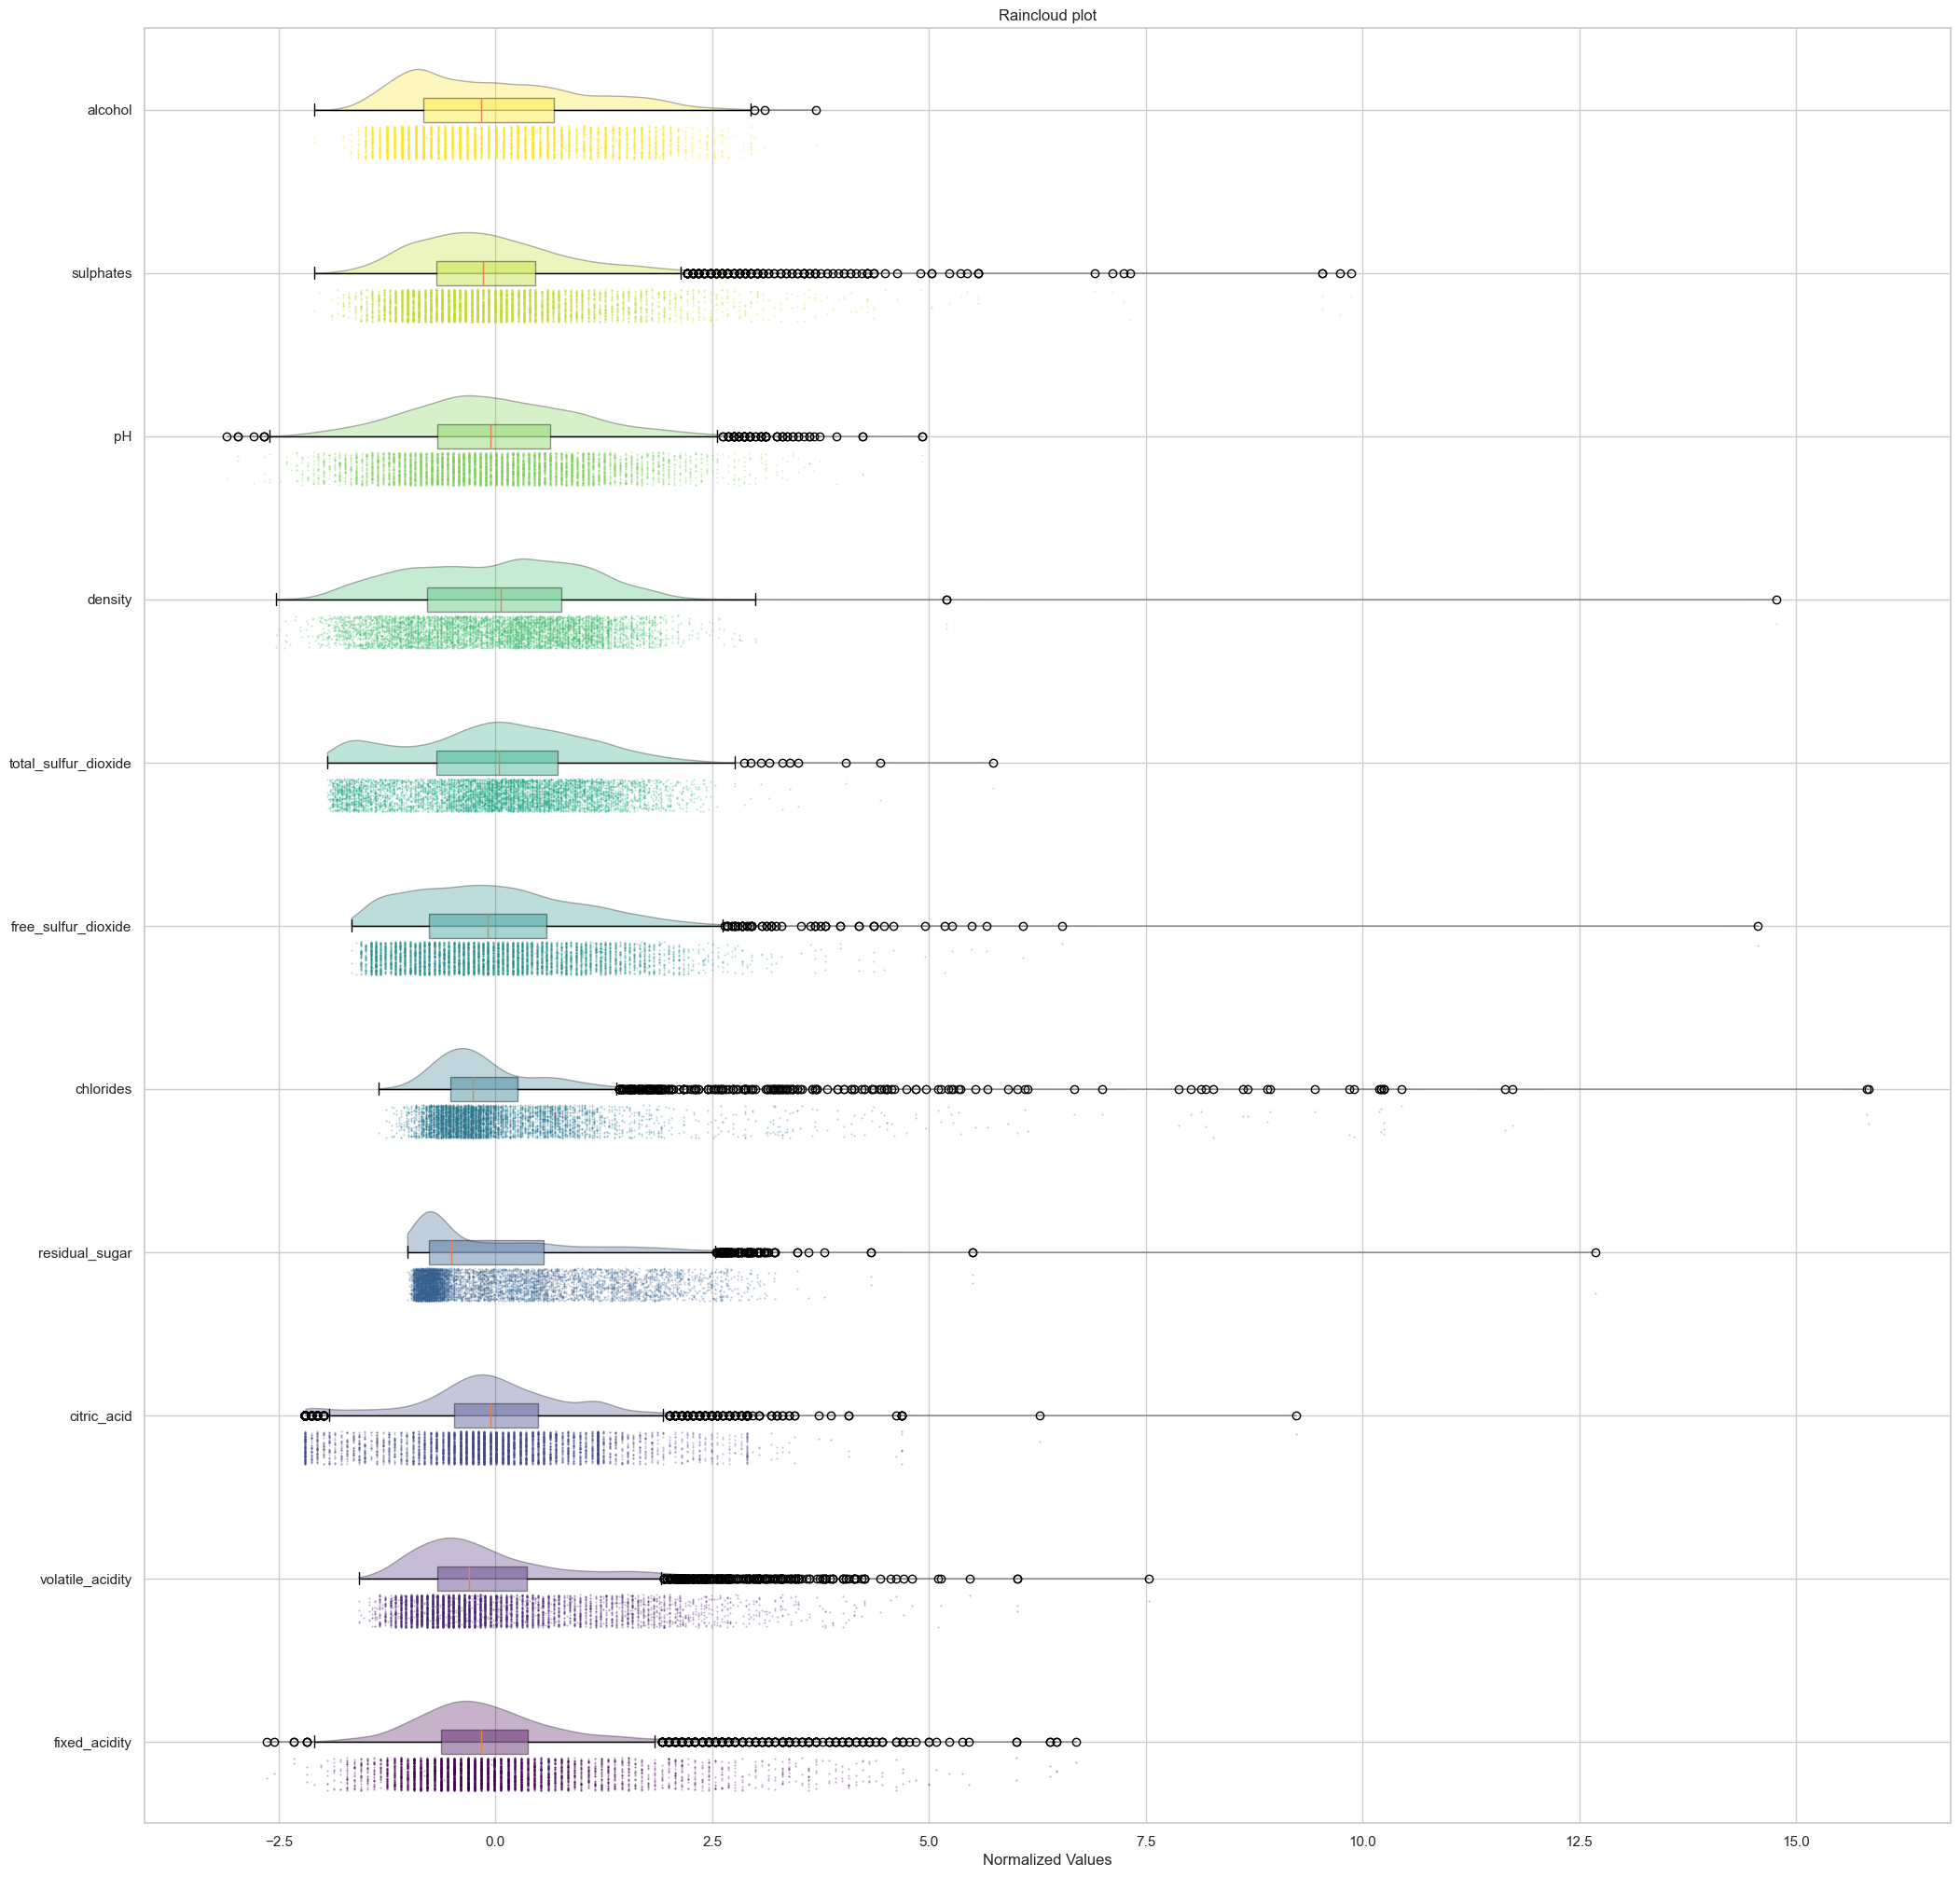

In [14]:
raincloud_plot(X_scaled)

Shown is a raincloud plot (a combination of top-side violin plot, box plot, and strip plot which appears as a rain cloud). This plot was chosen to visualize distribution together with the standard percentiles. For most of the features, the outliers seem to fall on the right -- outlier values are greater than the median. Here, plotted data are standard scaled to be able to compare with other features -- as it can be remembered that there are different scales for each feature and comparing them on their original scale would not make sense.

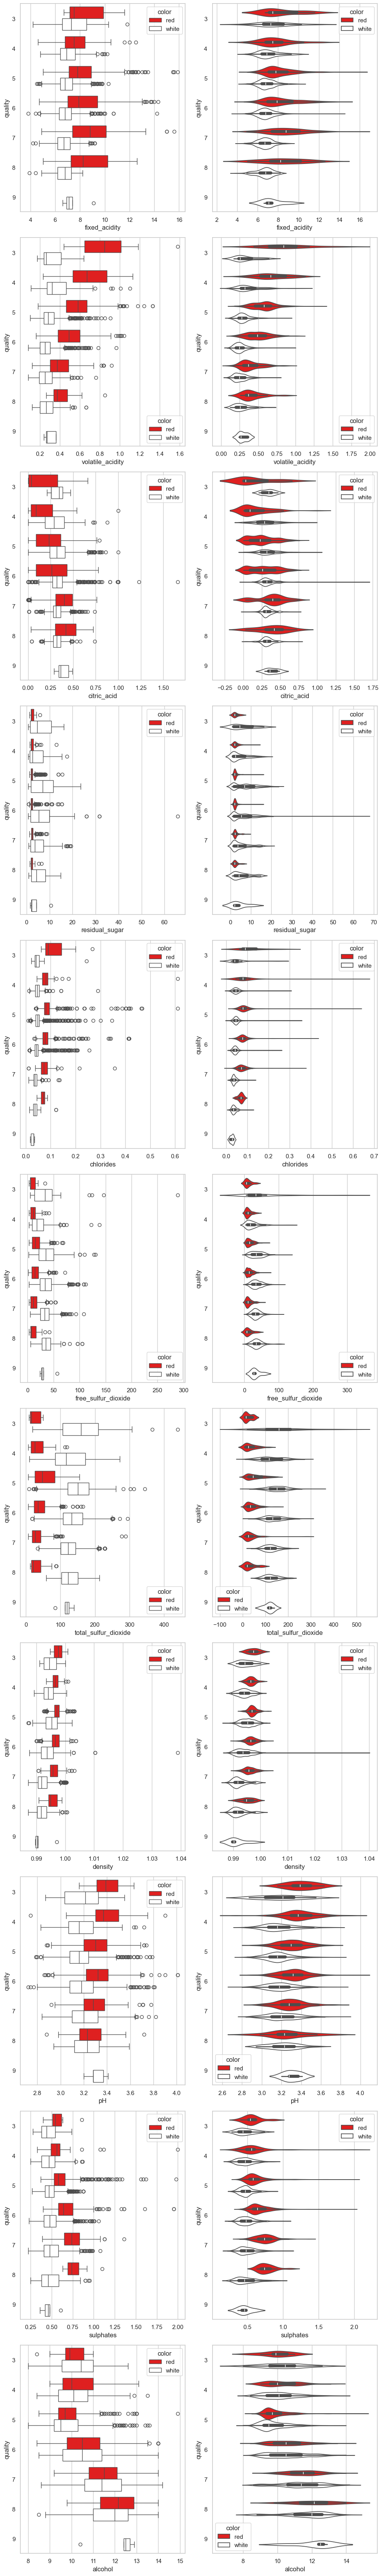

In [15]:
cols = X.columns[:-2]
fig, ax = plt.subplots(len(cols), 2, figsize=(10, 6*len(cols)))

for i, col in enumerate(cols):
    sns.boxplot(data=X, x=col, y='quality', orient='h', ax=ax[i, 0], hue='color', palette=color_palette)
    sns.violinplot(data=X, x=col, y='quality', orient='h', ax=ax[i, 1], hue='color', palette=color_palette)

plt.tight_layout()

A supplement to the previous raincloud plots are the boxplots and violinplots but for each feature compared for colors and for quality. With this, we can see the comparison of medians, outliers, and distributions for each feature for a given segment. This time, non-normalized data is used since the comparison are on their respective scales instead.

# Heatmaps for Correlation

In [16]:
onehotencoder = OneHotEncoder(sparse_output=False)

ohe = onehotencoder.fit_transform(X[['color']])
ohe = pd.DataFrame(ohe, columns=onehotencoder.get_feature_names_out())
X1 = pd.concat([X, ohe], axis=1).drop(['color'], axis=1)

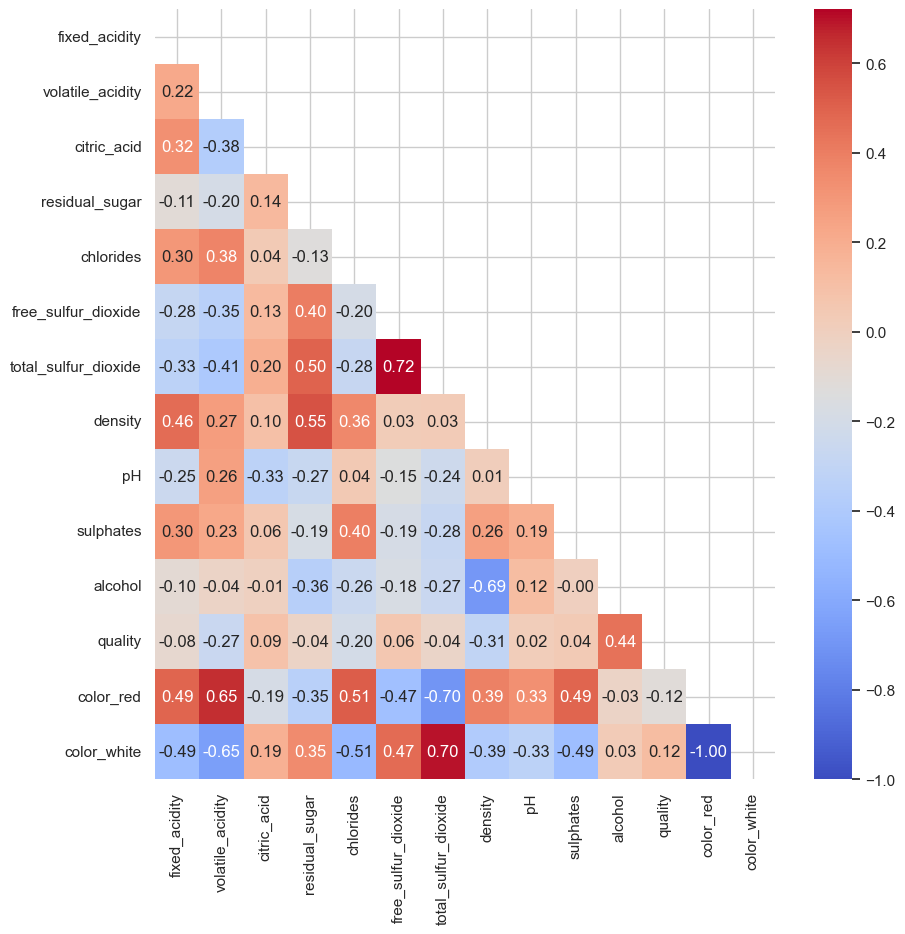

In [17]:
plt.figure(figsize=(10, 10))
corr = X1.corr()
sns.heatmap(
    corr,
    annot=True, 
    cmap='coolwarm',
    fmt=".2f", 
    mask=np.triu(corr)
);

A heatmap showing the different correlations between each feature. The targets (quality and the One-Hot Encoded color is also added). A noticeable correlation is that between total_sulfur_dioxide and free_sulfur_dioxide (+), and alcohol and density (-). One observation is that all features have very low correlation with quality (if we are talking about individual correlation). However for the case of color, some features are showing significant correlation (and negative correlation since color_red and color_white are mutually exclusive) for volatile_acidity, chlorides, and total_sulfur_dioxide.

The heatmap correlation on a specific cut of data (say only view the current wine data for color=red only or color=white) and see if the over all correlations are still the same.

The next heatmap correlation are divided for each color.

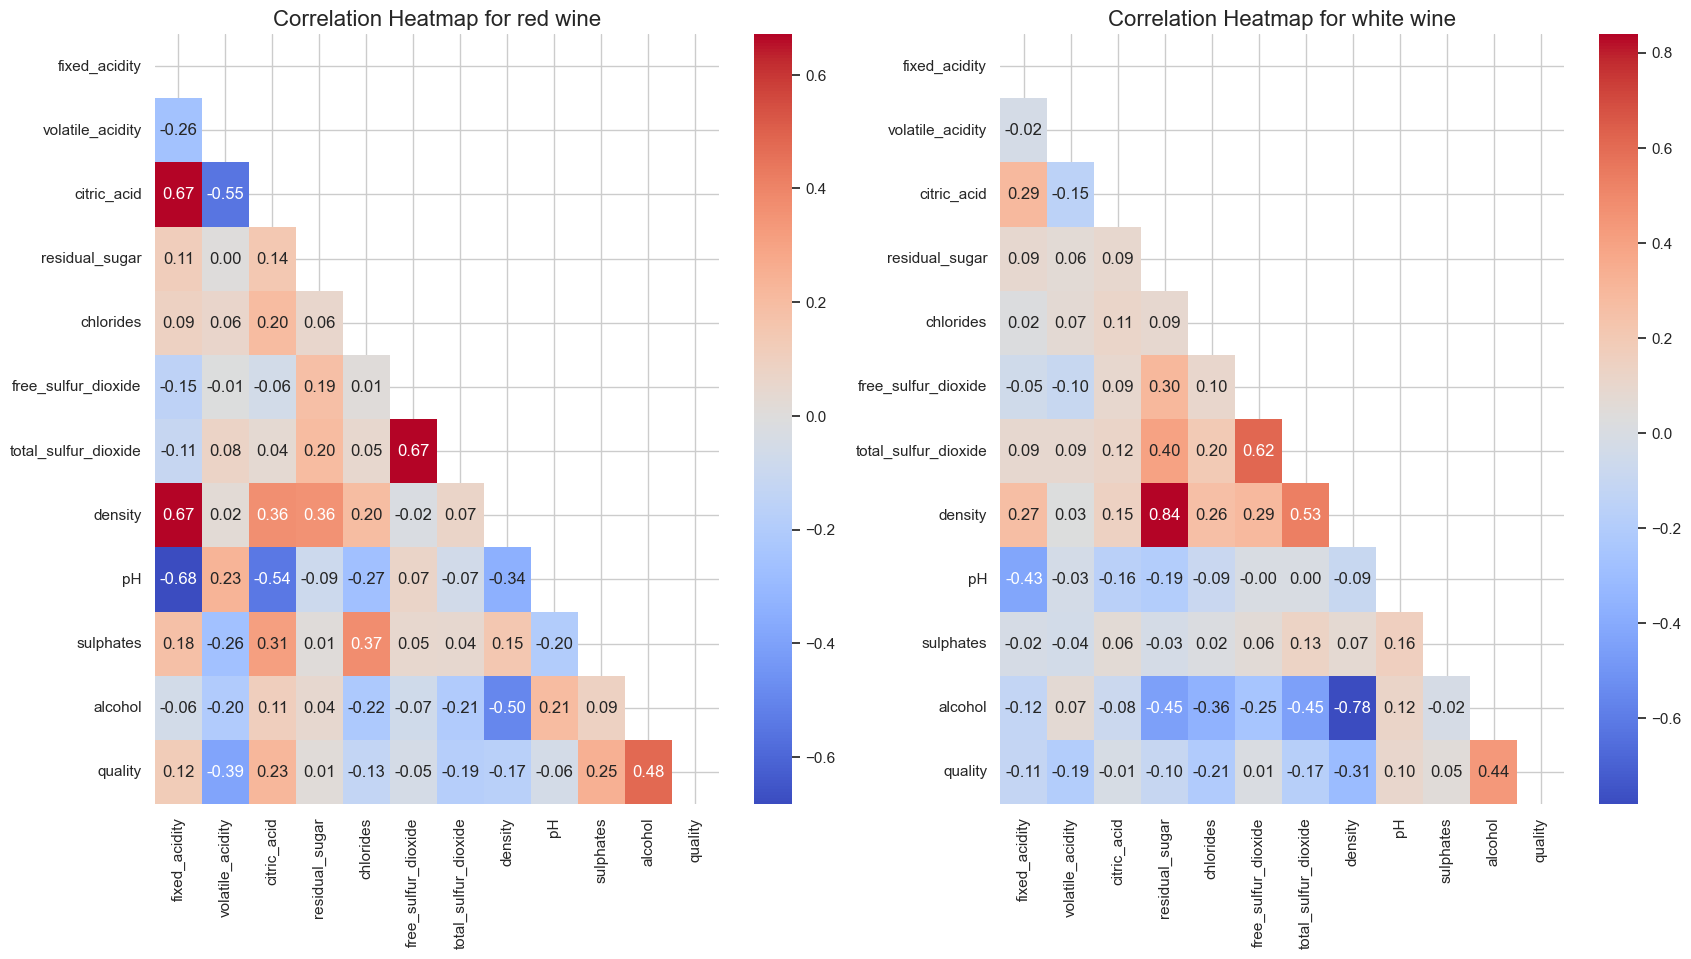

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

for i, color_name in enumerate(X['color'].unique()):
    corr = X1[X1[f'color_{color_name}']==1].drop(['color_red', 'color_white'], axis=1).corr()
    sns.heatmap(
        corr, 
        annot=True, 
        cmap='coolwarm',
        fmt=".2f", 
        ax=ax[i],
        mask=np.triu(corr)
    )
    ax[i].set_title(f'Correlation Heatmap for {color_name} wine', fontsize=16)
                  

Right now, the significant correlations we are now seeing for:

color=red

citric vs fixed_acidity (+), density vs fixed_acidity (+), pH vs fixed_acidity (-), total_sulfur_dioxide vs free_sulfur_dioxide (+)

color=white

density vs residual_sugar (+), total_sulfur_dioxide vs free_sulfur_dioxide (+), alcohol vs density (-)

A hypothesis created on mind is that feature pairs with significant correlation for a certain color (but not for the other) could be the reason for difference in color.

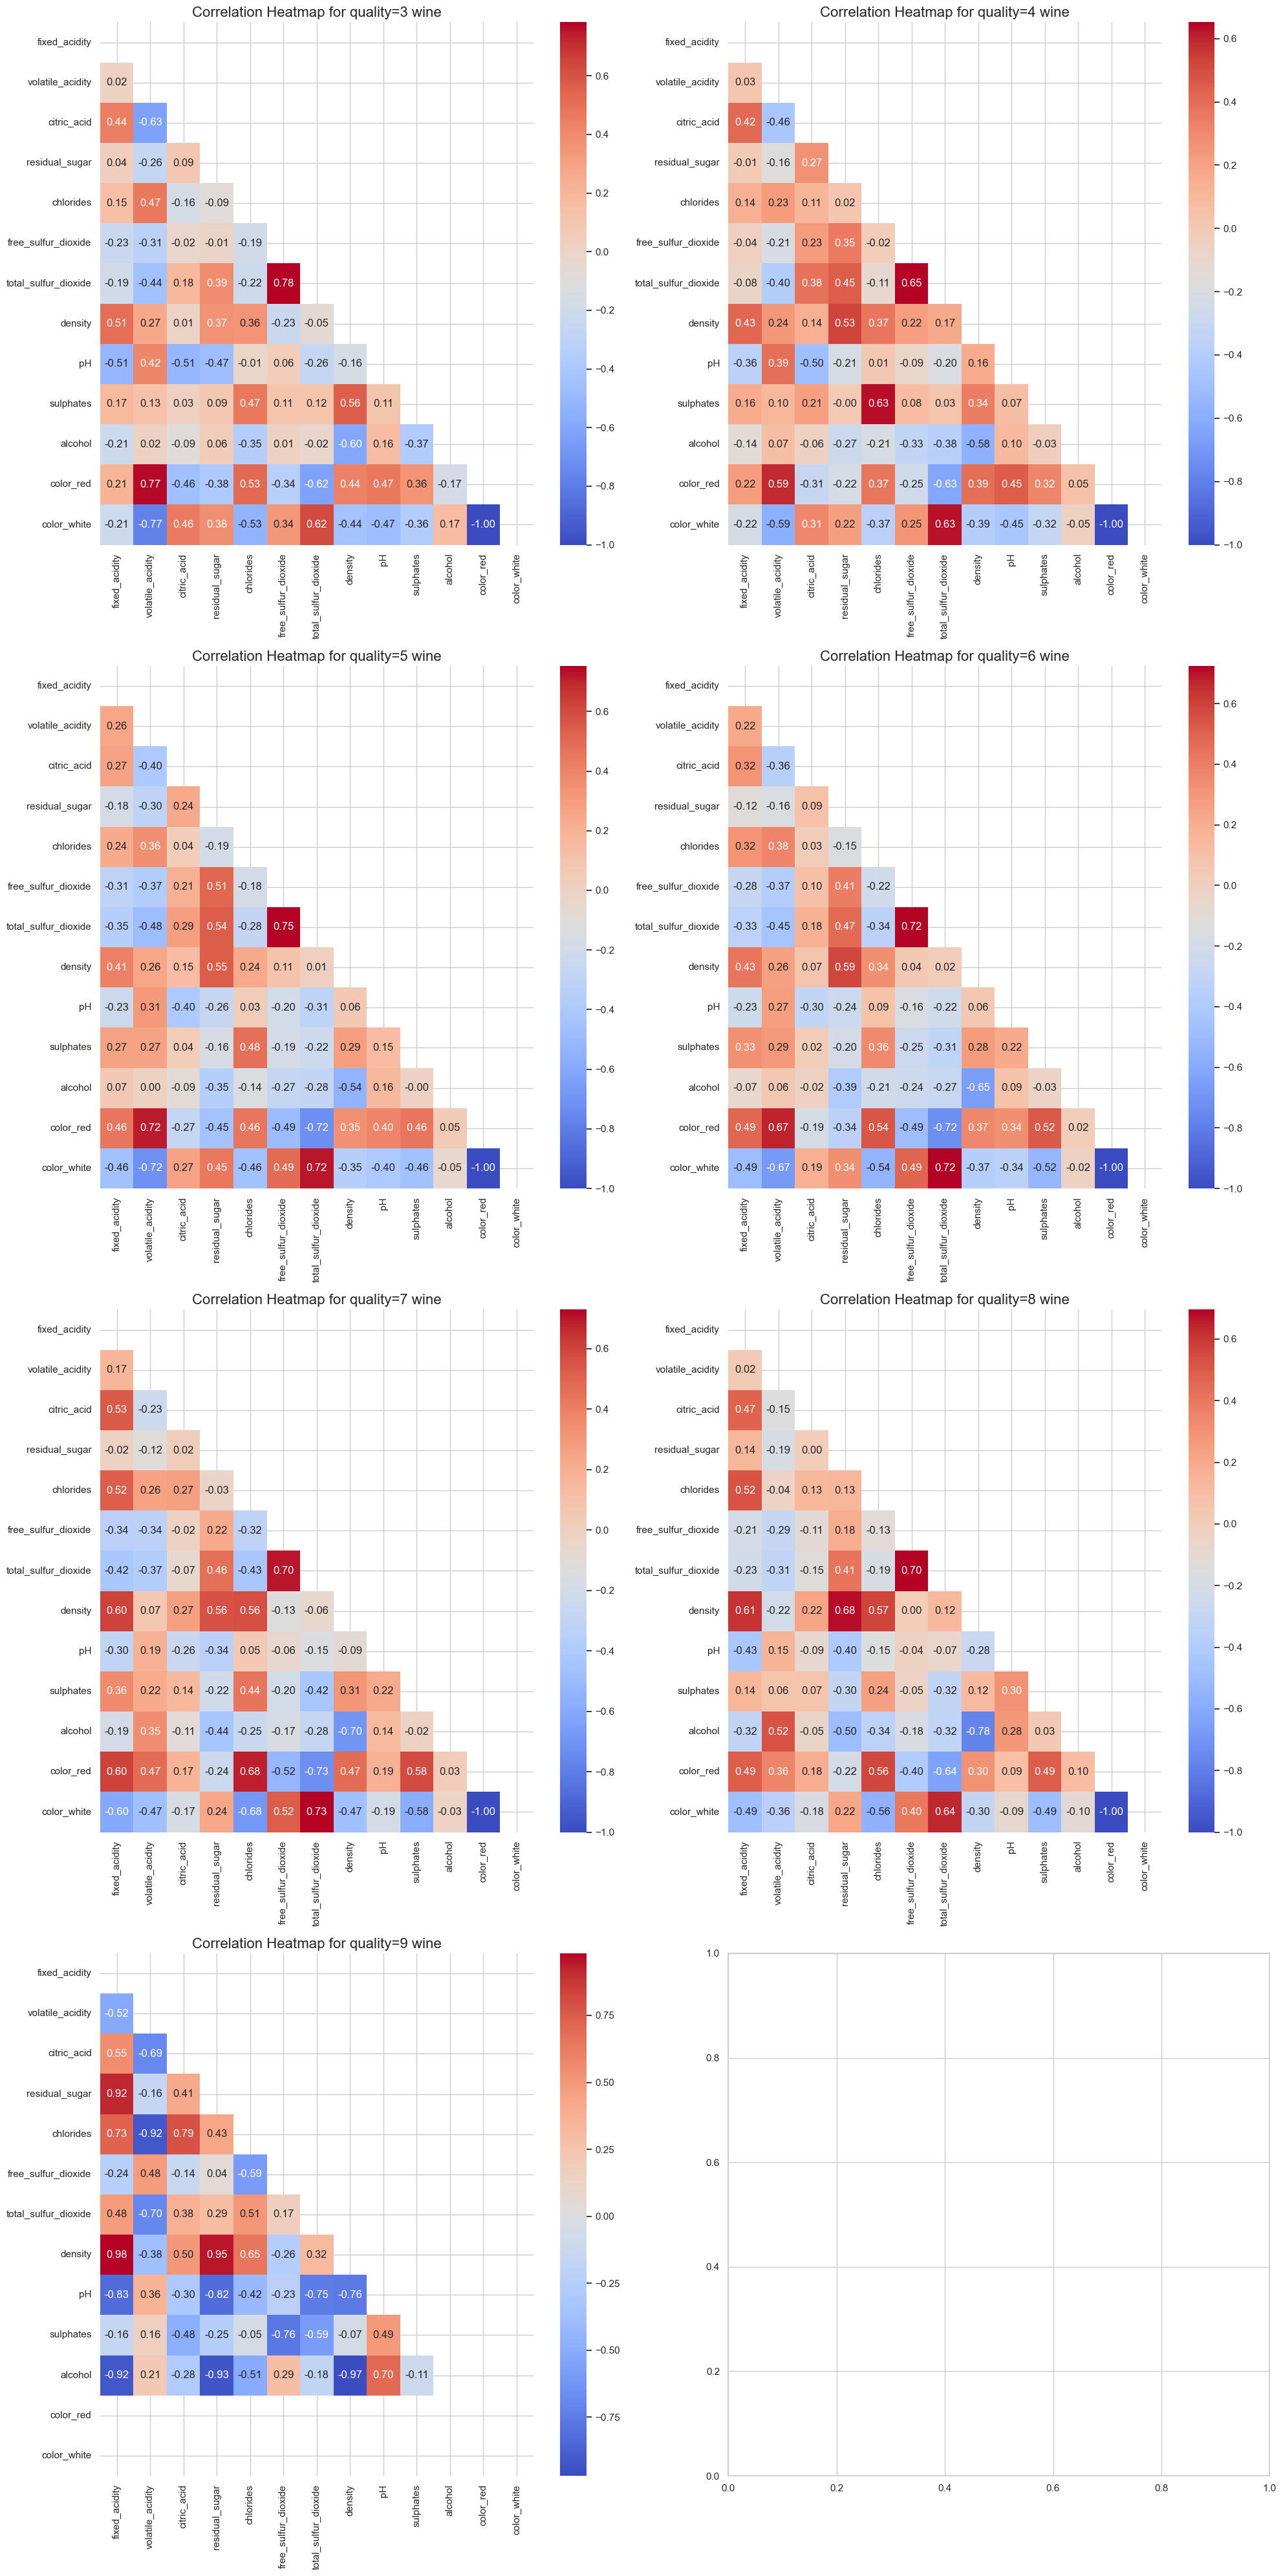

In [19]:
fig, ax = plt.subplots(4, 2, figsize=(20, 40))

for i, qual_name in enumerate(sorted(X['quality'].unique())):
    row = i // 2
    col = i % 2
    corr = X1[X1['quality']==qual_name].drop('quality', axis=1).corr()
    sns.heatmap(
        corr, 
        annot=True, 
        cmap='coolwarm',
        fmt=".2f", 
        ax=ax[row, col],
        mask=np.triu(corr)
    )
    ax[row, col].set_title(
        f'Correlation Heatmap for quality={qual_name} wine', 
        fontsize=16
    )

plt.tight_layout()

Some insights taken from these heatmaps:

quality=3

citric_acid vs volatile_acidity (-), total_sulfur_dioxide vs free_sulfur_dioxide (+), alcohol vs density (-), volatile_acidity vs color, total_sulfur_dioxide vs color

quality=4

total_sulfur_dioxide vs free_sulfur_dioxide (+). sulphates vs chlorides (+), total_sulfur_dioxide vs color

quality=5

total_sulfur_dioxide vs free_sulfur_dioxide (+), volatile_acidity vs color, total_sulfur_dioxide vs color

quality=6

total_sulfur_dioxide vs free_sulfur_dioxide (+), alcohol vs density (-), volatile_acidity vs color, total_sulfur_dioxide vs color

quality=7

density vs fixed_acidity (+), total_sulfur_dioxide vs free_sulfur_dioxide (+), density vs alcohol (-), chlorides vs color, total_sulfur_dioxide vs color, fixed_acidity vs color

quality=8

density vs fixed_acidity (+), density vs residual_sugar (+), total_sulfur_dioxide vs free_sulfur_dioxide (+), density vs alcohol (-), total_sulfur_dioxide vs color

quality=9

Due to small count for quality=9, a lot of correlations are observed but hard to be trusted. Also note that no quality=9 exists for color=red hence correlations for both color does not exist.

There are some features that show significant correlation for a given quality value but show less correlation for the same feature pair but different quality value. This may mean that those features may have an impact (or not) for that given quality.

# Summary

There were multiple plots utilized:

- **Histogram** - Distribution of data for each quality. This was generated first to have an understanding on the distribution of data.
- **Bar plot** - Visualization of mean for each feature.
- **Pair plot** - Scatter plot to visualize data for each pair of features (diagonals as distributions).
- **Raincloud plot** - Shows overview of percentiles, outliers, and distributions *against other* features.
- **Pair of Boxplot and Violinplot** - Shows a more in-depth view of percentiles, outliers, and distributions *for each* feature.
- **Heatmaps** - Visualize correlation of each features.

The main points of interest are distribution, means, and relationship of variables between one another. One would want to see the relationship between each independent variables and also how these independent variables affect the dependent variables. This helps in having an internal intuition of a pattern that can aid in developing machine learning models. With those interests in mind, that is why the listed plots are selected in supporting how to understand the data better.

On the notebook, I have also added some insights/assumptions based from the visualizations that can be used to create hypotheses which can be tested later on. 

Without deep domain knowledge, these plots have provided me valuable insights. However, it is undeniable that domain knowledge is irreplaceable and in my opinion is still superior. 

### References

- Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). *Wine Quality Data Set*. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/186/wine+quality
- Belengeanu, A. (2022, December 5). *Getting started with Raincloud plots in Python*. Medium. https://medium.com/@alexbelengeanu/getting-started-with-raincloud-plots-in-python-2ea5c2d01c11
